In [22]:
# https://www.kaggle.com/datasets/uciml/student-alcohol-consumption

# Problem badawczy: Czy picie alkoholu wpływa na oceny uczniów

# IMPORT DANYCH

from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, ensemble
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import warnings
warnings.filterwarnings('always')

data = pd.read_csv('student-mat.csv')
pd.set_option("display.max_columns", None)
data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


In [51]:
# Sprawdzanie pustych wartości 

data.isnull().any()

school        False
age           False
famsize       False
Pstatus       False
Medu          False
Fedu          False
traveltime    False
studytime     False
schoolsup     False
famsup        False
paid          False
activities    False
higher        False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G3            False
dtype: bool

In [24]:
print(data.describe())
print(data.info())
print(data.isnull().values.any())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

In [25]:
# USUWANIE KOLUMN

# school : 1 = GP, 0 = MS
# age : 1 = M, 0 = F
# address : 1 = U, 0 = R
# family size - famsize : 1 = GT3, 0 = LE3
# Parent's cohabitation status - Pstatus : 1 = T (together), 0 = A (Aparat)


data = data.replace({'school' : {'GP': 1, 'MS': 0}, 'sex' : {'M' : 1, 'F' : 0}, 'address' : {'U' : 1, 'R' : 0}, 
                     'famsize' : {'GT3' : 1, 'LE3' : 0}, 'Pstatus' : {'T' : 1, 'A' : 0}})
data.head(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,0,18,1,1,0,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,1,0,17,1,1,1,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,1,0,15,1,0,1,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,1,0,15,1,1,1,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,1,0,16,1,1,1,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,1,1,16,1,0,1,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,1,1,16,1,0,1,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,1,0,17,1,1,0,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,1,1,15,1,0,0,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,1,1,15,1,1,1,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


In [26]:
data = data.drop(['sex','address','Mjob','Fjob','reason','guardian','failures','nursery','internet','G1','G2'], axis=1)

In [27]:
print(data.describe())
print(data.info())
print(data.isnull().values.any())
data.head(10)

           school         age     famsize     Pstatus        Medu        Fedu  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     0.883544   16.696203    0.711392    0.896203    2.749367    2.521519   
std      0.321177    1.276043    0.453690    0.305384    1.094735    1.088201   
min      0.000000   15.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   16.000000    0.000000    1.000000    2.000000    2.000000   
50%      1.000000   17.000000    1.000000    1.000000    3.000000    2.000000   
75%      1.000000   18.000000    1.000000    1.000000    4.000000    3.000000   
max      1.000000   22.000000    1.000000    1.000000    4.000000    4.000000   

       traveltime   studytime      famrel    freetime       goout        Dalc  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     1.448101    2.035443    3.944304    3.235443    3.108861    1.481013   
std      0.697505    0.8392

,school,age,famsize,Pstatus,Medu,Fedu,traveltime,studytime,schoolsup,famsup,paid,activities,higher,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,1,18,1,0,4,4,2,2,yes,no,no,no,yes,no,4,3,4,1,1,3,6,6
1,1,17,1,1,1,1,1,2,no,yes,no,no,yes,no,5,3,3,1,1,3,4,6
2,1,15,0,1,1,1,1,2,yes,no,yes,no,yes,no,4,3,2,2,3,3,10,10
3,1,15,1,1,4,2,1,3,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15
4,1,16,1,1,3,3,1,2,no,yes,yes,no,yes,no,4,3,2,1,2,5,4,10
5,1,16,0,1,4,3,1,2,no,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15
6,1,16,0,1,2,2,1,2,no,no,no,no,yes,no,4,4,4,1,1,3,0,11
7,1,17,1,0,4,4,2,2,yes,yes,no,no,yes,no,4,1,4,1,1,1,6,6
8,1,15,0,0,3,2,1,2,no,yes,yes,no,yes,no,4,2,2,1,1,1,0,19
9,1,15,1,1,3,4,1,2,no,yes,yes,yes,yes,no,5,5,1,1,1,5,0,15


In [28]:
# PODMIANA WARTOŚCI

data = data.replace({'schoolsup':{'yes': 1, 'no': 0}, 'famsup': {'yes': 1, 'no': 0}, 'paid':{'yes': 1, 'no': 0},'activities':{'yes': 1, 'no': 0}, 'higher':{'yes':1, 'no': 0}, 'romantic':{'yes':1, 'no':0},})

In [29]:
data.head(10)

,school,age,famsize,Pstatus,Medu,Fedu,traveltime,studytime,schoolsup,famsup,paid,activities,higher,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,1,18,1,0,4,4,2,2,1,0,0,0,1,0,4,3,4,1,1,3,6,6
1,1,17,1,1,1,1,1,2,0,1,0,0,1,0,5,3,3,1,1,3,4,6
2,1,15,0,1,1,1,1,2,1,0,1,0,1,0,4,3,2,2,3,3,10,10
3,1,15,1,1,4,2,1,3,0,1,1,1,1,1,3,2,2,1,1,5,2,15
4,1,16,1,1,3,3,1,2,0,1,1,0,1,0,4,3,2,1,2,5,4,10
5,1,16,0,1,4,3,1,2,0,1,1,1,1,0,5,4,2,1,2,5,10,15
6,1,16,0,1,2,2,1,2,0,0,0,0,1,0,4,4,4,1,1,3,0,11
7,1,17,1,0,4,4,2,2,1,1,0,0,1,0,4,1,4,1,1,1,6,6
8,1,15,0,0,3,2,1,2,0,1,1,0,1,0,4,2,2,1,1,1,0,19
9,1,15,1,1,3,4,1,2,0,1,1,1,1,0,5,5,1,1,1,5,0,15


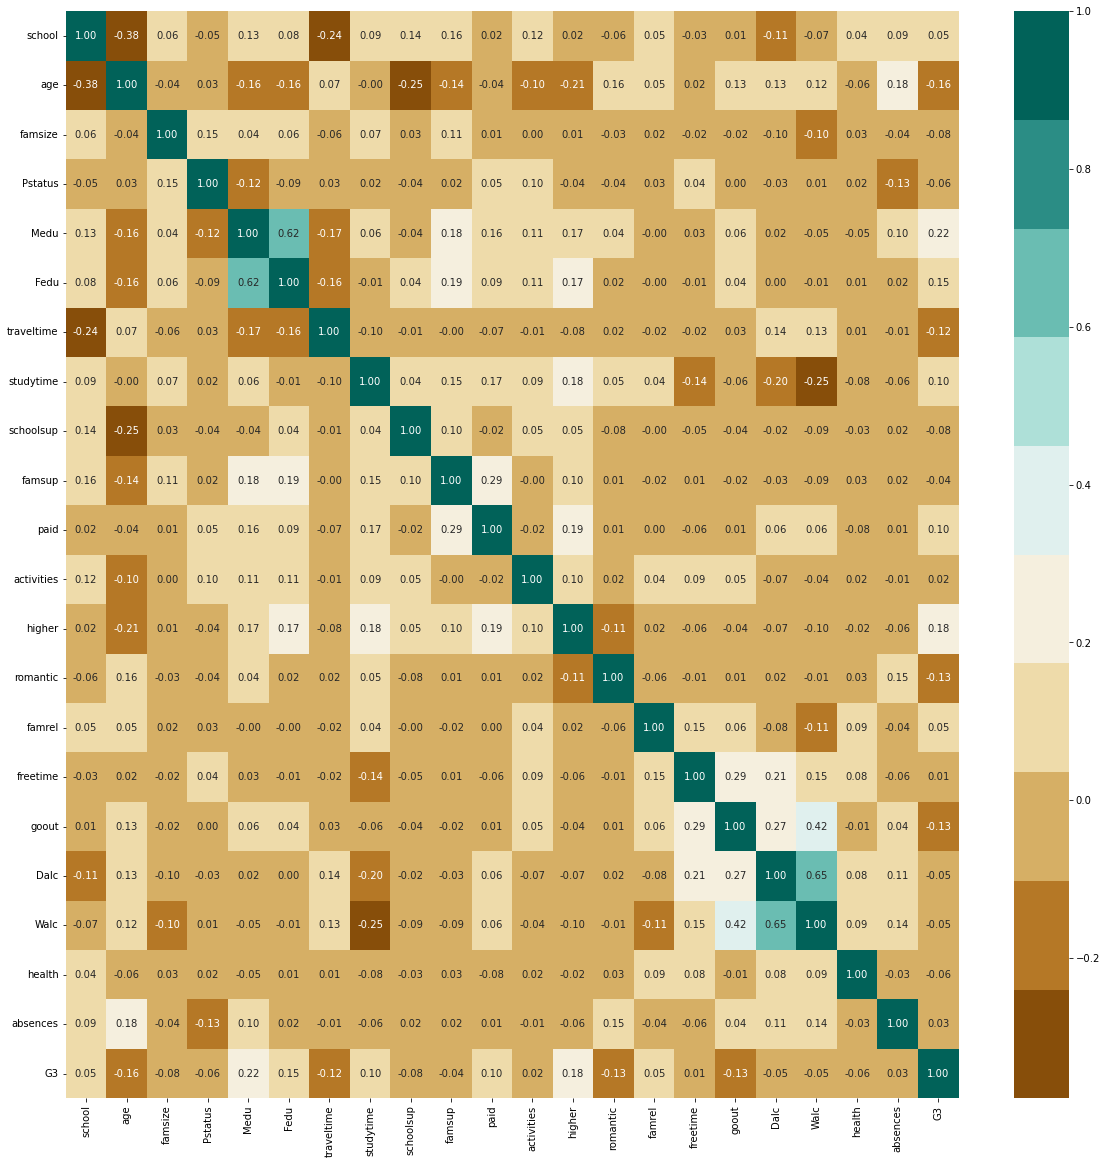

In [30]:
correlations = data.corr()
fig, ax = plt.subplots(figsize=(20, 20))

colormap = sns.color_palette("BrBG", 10)

sns.heatmap(correlations, 
    cmap=colormap, 
    annot=True, 
    fmt=".2f")
ax.set_yticklabels(data.columns);

plt.show()

<AxesSubplot:>

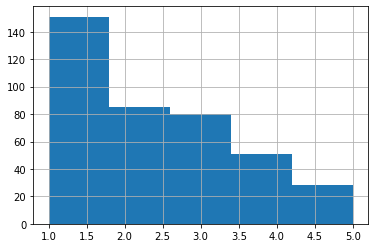

In [31]:
# Weekendowe spożycie alkoholu, 1 - mało spożycia, 5 - dużo spożycia

data['Walc'].hist(bins=5) 

<AxesSubplot:>

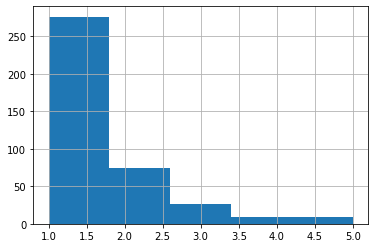

In [32]:
# Dni robocze - spożycie alkoholu, 1 - mało spożycia, 5 - dużo spożycia

data['Dalc'].hist(bins=5)

In [33]:
data.to_csv('daneDoModelu.csv')

<AxesSubplot:>

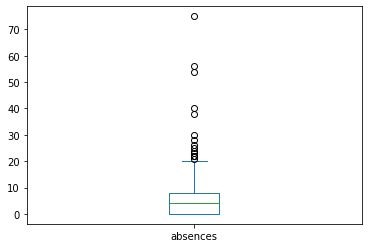

In [57]:
# Nieobecności uczniów

data['absences'].plot.box()


<AxesSubplot:>

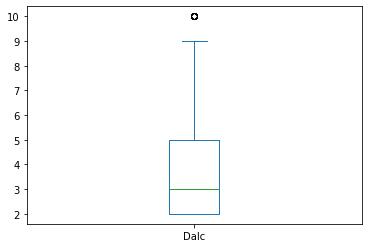

In [56]:
data['Dalc'].plot.box()

Text(0.5, 0, 'Tygodniowe spożycie alkoholu')

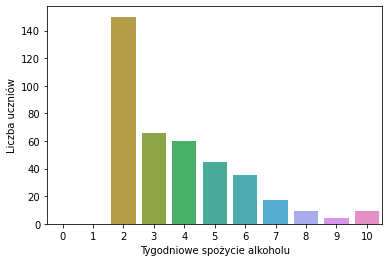

In [35]:
# przewaga osob, ktore nie pija duzo alkoholu. Kazdy student pije alkohol min. 2 razy w ciagu tygodnia.

data['Dalc'] = data['Dalc'] + data['Walc']
list = []
for i in range(11):
    list.append(len(data[data.Dalc == i]))
ax = sns.barplot(x = [0,1,2,3,4,5,6,7,8,9,10], y = list)
plt.ylabel('Liczba uczniów')
plt.xlabel('Tygodniowe spożycie alkoholu')

In [36]:
# zbiór danych

X = data.drop('G3', axis=1).to_numpy()
X

array([[ 1, 18,  1, ...,  1,  3,  6],
       [ 1, 17,  1, ...,  1,  3,  4],
       [ 1, 15,  0, ...,  3,  3, 10],
       ...,
       [ 0, 21,  1, ...,  3,  3,  3],
       [ 0, 18,  0, ...,  4,  5,  0],
       [ 0, 19,  0, ...,  3,  5,  5]])

In [37]:
y = data.loc[:, 'G3'].to_numpy()
y

array([ 6,  6, 10, 15, 10, 15, 11,  6, 19, 15,  9, 12, 14, 11, 16, 14, 14,
       10,  5, 10, 15, 15, 16, 12,  8,  8, 11, 15, 11, 11, 12, 17, 16, 12,
       15,  6, 18, 15, 11, 13, 11, 12, 18, 11,  9,  6, 11, 20, 14,  7, 13,
       13, 10, 11, 13, 10, 15, 15,  9, 16, 11, 11,  9,  9, 10, 15, 12,  6,
        8, 16, 15, 10,  5, 14, 11, 10, 10, 11, 10,  5, 12, 11,  6, 15, 10,
        8,  6, 14, 10,  7,  8, 18,  6, 10, 14, 10, 15, 10, 14,  8,  5, 17,
       14,  6, 18, 11,  8, 18, 13, 16, 19, 10, 13, 19,  9, 16, 14, 13,  8,
       13, 15, 15, 13, 13,  8, 12, 11,  9,  0, 18,  0,  0, 12, 11,  0,  0,
        0,  0, 12, 15,  0,  9, 11, 13,  0, 11,  0, 11,  0, 10,  0, 14, 10,
        0, 12,  8, 13, 10, 15, 12,  0,  7,  0, 10,  7, 12, 10, 16,  0, 14,
        0, 16, 10,  0,  9,  9, 11,  6,  9, 11,  8, 12, 17,  8, 12, 11, 11,
       15,  9, 10, 13,  9,  8, 10, 14, 15, 16, 10, 18, 10, 16, 10, 10,  6,
       11,  9,  7, 13, 10,  7,  8, 13, 14,  8, 10, 15,  4,  8,  8, 10,  6,
        0, 17, 13, 14,  7

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4321) 

In [39]:
# uniwersalna metoda do trenowania i oceny modeli

def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # trenuj model
    classifier.fit(feature_vector_train, label)
    
    with open('titanic_classifier.pickle', 'wb') as handle:
        pickle.dump(classifier, handle)
    
    # wygeneruj przewidywania modelu dla zbioru testowego
    predictions = classifier.predict(feature_vector_valid)
    
    # dokonaj ewaluacji modelu na podstawie danych testowych
    score_vals = [
        metrics.mean_squared_error(predictions, y_test),
        metrics.mean_absolute_error(predictions, y_test)
    ]
    return score_vals

In [46]:
# MODEL 1 - regresja liniowa
accuracy = train_model(linear_model.LinearRegression(), X_train, y_train, X_test)
accuracy_compare = {'LR': accuracy}
print ("LR: ", accuracy)

# MODEL 2 - RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_s tate = 0)
accuracy = train_model(regressor, X_train, y_train, X_test)
accuracy_compare['random forrest tree'] = accuracy
print ('random forrest tree' , accuracy)

LR:  [19.084842888182045, 3.236936634444377]
random forrest tree [14.440381012658227, 2.877594936708861]


<AxesSubplot:>

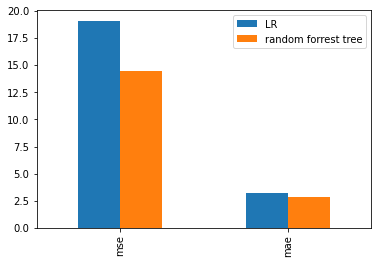

In [47]:
# porównanie modeli

df_compare = pd.DataFrame(accuracy_compare, index = ['mse', 'mae'])
df_compare.plot(kind='bar')

In [42]:
# MODEL 3 - Random Forest Tree 
accuracy = train_model(ensemble.RandomForestClassifier(), X_train, y_train, X_test)
accuracy_compare['RF'] = accuracy
print ("RF: ", accuracy)

RF:  [19.354430379746834, 3.050632911392405]


In [49]:
# test manualny
regressor.predict([[1, 18, 1, 0, 4, 4, 2, 2, 1, 0, 0, 0, 1, 0, 4, 3, 4, 1, 1, 3, 6]])

array([6.91])

In [50]:
# działania korygujące - hiperparametry

# MODEL 3 - RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
accuracy = train_model(regressor, X_train, y_train, X_test)
accuracy_compare['random forrest tree'] = accuracy
print ('random forrest tree' , accuracy)

random forrest tree [14.516170604781992, 2.836160337552742]
